<a href="https://colab.research.google.com/github/adavals/bedu-datascience-f3m1/blob/main/postwork__1_al_8_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Antecedentes
---
La Procuraduría Federal del Consumidor en México publica anualmente los datos de las quejas tramitadas por los consumidores. Estos datos están publicados en un archivo excel por año.
### Problema
Aprovechar los datos publicados por PRFECO para que el consumidor conozca cuál es la expectativa de éxito al colocar una queja de acuerdo con sus características.
### Preguntas
1. ¿En qué porcentaje los consumidores ganan las quejas??
2. ¿Cuál es el tiempo en que se resuelve una queja?
3. ¿Qué porcentaje del monto reclamado normalmente obtendría en caso de ganar? 
4. ¿Contra qué establecimientos hay más quejas registradas?
5. ¿Hay diferencia en el resultado de acuerdo al medio de ingreso de la queja (presencial, internet, teléfono, etc.)?

### Fuente dataset año 2021: 
- https://datos.profeco.gob.mx/datos_abiertos/
- https://datos.profeco.gob.mx/#herramientas

### Diccionario de datos
Fuente: [Datos abiertos Subprocuraduría de Servicios](https://datos.profeco.gob.mx/diccionarioDatos.php)


|Columna|Tipo|Concepto|
|---|---|---|
|ID_EXP|Caracter(20)|Número que identifica a un expediente dentro de la base de datos. No se refiere al número de expediente administrativo de Profeco.|
|FECHA_INGRESO|Fecha "dd-mm-aaaa"|Fecha en que ingresó la queja en el Sistema Integral de Información y Procesos.|
|FECHA_FIN|Fecha "dd-mm-aaaa"|Fecha en que se concluyó el procedimiento.|
|TIPO_CONCILIACION|Caracter(50)|Valor que indica la forma de conciliación o el estado en que se encuentra la reclamación. Los valores que considera son: <br/> - Capturada: No ha sido turnada a un tipo de conciliación.<br/>- Cancelada.Capturada por error o duplicada.<br/>- Capturada: No ha sido turnada a un tipo de conciliación.<br/>- En Proceso: No ha sido turnada a un tipo de conciliación.<br/>- Turnada a Concil Domiciliaria: Conciliación realizada en el domicilio del proveedor.<br/>- Turnada a Concil Medios Elec.: Conciliación por medio de la plataforma Concilianet.<br/>- Turnada a Concil Person p/seg.: Conciliación personal realizada en una Unidad Administrativa.<br/>- Turnada a Concil Resi p/ segui: Conciliación telefónica o por medios electrónicos para residentes en el extranjero.<br/>- Turnada a Concil Telefónica: Conciliación realizada en una conferencia telefónica.|
|ESTADO_PROCESAL|Caracter(50)|Indica si la queja fue conciliada, no conciliada, cancelada, si hubo desistimiento, si fue improcedente o bien si se encuentra en trámite.
|PROVEEDOR|	Caracter(200)|	Razón social del proveedor asociado a la queja.
|NOMBRE_COMERCIAL|	Caracter(200)|	Nombre comercial asociado a la razón social.
|GIRO|	Caracter(300)|	Actividad comercial asociada al proveedor, de acuerdo al catálogo del Sistema Integral de Información y Procesos.
|SECTOR	|Caracter(100)	|Sector comercial asociado al proveedor.
|UA	|Caracter(100)	|Delegación, Subdelegación o Unidad de Servicio de Profeco en la que se ingresó la queja.
|ESTADO_UA	|Caracter(100)	|Entidad Federativa en la que se localiza la unidad administrativa de Profeco.
|TIPO_RECLAMACION	|Caracter(200)	|Es una clasificación de la queja de acuerdo a lo expresado por la o el consumidor.
|MOTIVO_RECLAMACION	|Caracter(200)	|Es una subclasificación de la queja dependiente del tipo de reclamación.
|COSTO_BIEN	|Decimal(16,2)	|Monto |(precio) del bien o servicio relacionado con la queja.
|RECLAMADO	|Decimal(16,2)	|Monto reclamado por la o el consumidor derivado de su queja.
|RECUPERADO	|Decimal(16,2)	|Monto recuperado a favor de la o el consumidor una vez concluido el procedimiento.
|PROCEDIMIENTO	|Caracter(50)	|Tipo de procedimiento (queja, procedimiento por infracciones a la ley y arbitraje) mediante el cual se recuperó el monto reclamado.
|BIEN_SERVICIO	|Caracter(50)	|Clasificación de acuerdo a lo que se reclamó en la queja: un bien o un servicio.
|MEDIO_INGRESO	|Caracter(50)	|Formas de ingreso de la queja a Profeco: escrita, personal, internet, medios electrónicos o telefónica.
|TIPO_PRODUCTO	|Caracter(50)	|Se refiere a si el producto es nuevo, usado o reconstruido y si el servicio es normal (principal) o adicional.
|MODALIDAD_COMPRA	|Caracter(100)	|Lugar o forma en la que se adquirió el bien o servicio: a domicilio, por internet, por teléfono, imposición del proveedor, en establecimiento físico.
|MODALIDAD_PAGO	|Caracter(50)	|Forma de pago del bien o servicio: al contado, a plazos, por apartado.
|PROBLEMA_ESPECIAL	|Caracter(100)	|Identifica quejas relacionadas con una problemática o evento específico relevante para Profeco.

## Carga y limpieza de dataset
---

In [83]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, kurtosis
import numpy as np

sns.set(style='white')
warnings.filterwarnings('ignore')

In [47]:
df_raw = pd.read_excel('https://github.com/adavals/bedu-datascience-f3m1/blob/main/dat/DATOS_ABIERTOS_QUEJAS_PROFECO_2021.xlsx?raw=true', index_col=0)

In [48]:
df_raw.head(3)

,FECHA_INGRESO,FECHA_FIN,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,UA,ESTADO_UA,...,COSTO_BIEN,RECLAMADO,RECUPERADO*,PROCEDIMIENTO,BIEN_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL
ID_EXP,,,,,,,,,,,,,,,,,,,,,
2021_3451,2021-01-03 11:19:00,-,En Proceso,En Trámite,"DENTIX MEXICO HEALTH, SC",DENTIMEX,"HOSPITAL, CLÍNICAS Y SANATORIOS","HOSPITAL, CLÍNICAS Y SANATORIOS",ZONA ALTIPLANO (SAN LUIS POTOSÍ),SAN LUIS POTOSÍ,...,-,NaN,NaN,Queja,-,-,-,-,-,-
2021_180,2021-01-04 12:31:00,2021-02-10 00:00:00,Turnada a Concil Resi p/ segui,Desistimiento,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,DIRECCIÓN DE CONCILIACIÓN Y PR,CIUDAD DE MÉXICO,...,0,NaN,NaN,Conciliación de resid en ext,Servicio,Correo Electrónico,Servicio normal,Por internet,Contado,No problema especial
2021_181,2021-01-04 12:49:00,-,Turnada a Concil Resi p/ segui,En Trámite,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,DIRECCIÓN DE CONCILIACIÓN Y PR,CIUDAD DE MÉXICO,...,690.04,NaN,NaN,Conciliación de resid en ext,Servicio,Correo Electrónico,Servicio normal,Por internet,Contado,No problema especial


In [49]:
# Selección de quejas con trámite concluido mediante fecha de finalización no vacía
df_raw = df_raw[df_raw['FECHA_FIN'] != '-']
df = df_raw.copy()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62413 entries, 2021_180 to 2021_70145
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA_INGRESO       62413 non-null  datetime64[ns]
 1   FECHA_FIN           62413 non-null  object        
 2   TIPO_CONCILIACION   62413 non-null  object        
 3   ESTADO_PROCESAL     62413 non-null  object        
 4   PROVEEDOR           62413 non-null  object        
 5   NOMBRE_COMERCIAL    62413 non-null  object        
 6   GIRO                62413 non-null  object        
 7   SECTOR              62413 non-null  object        
 8   UA                  62413 non-null  object        
 9   ESTADO_UA           62413 non-null  object        
 10  TIPO_RECLAMACION    62413 non-null  object        
 11  MOTIVO_RECLAMACION  62413 non-null  object        
 12  COSTO_BIEN          62413 non-null  object        
 13  RECLAMADO           37175 non-null  obj

---
### Actividades de limpieza
> - Se observan datos nulos en las variables COSTO_BIEN, RECLAMADO Y RECUPERADO
> - Se requiere quitar el asterisco final en el nombre a la columna RECUPERADO*
> - Se requiere convertir tipos de datos fecha y numéricos
---

In [51]:
# Corrección de nombre de columna
df.rename(columns = {'RECUPERADO*':'RECUPERADO'}, inplace = True)

In [52]:
# Conversión de tipos de datos
df['FECHA_FIN'] = pd.to_datetime(df['FECHA_FIN'], format='%Y-%m-%d %H:%M:%S')
df['COSTO_BIEN'] = pd.to_numeric(df['COSTO_BIEN'],errors = 'coerce')
df['RECLAMADO'] = pd.to_numeric(df['RECLAMADO'],errors = 'coerce')
df['RECUPERADO'] = pd.to_numeric(df['RECUPERADO'],errors = 'coerce')

In [53]:
# Revisión de valores nulos
df.isna().sum()

FECHA_INGRESO             0
FECHA_FIN                 0
TIPO_CONCILIACION         0
ESTADO_PROCESAL           0
PROVEEDOR                 0
NOMBRE_COMERCIAL          0
GIRO                      0
SECTOR                    0
UA                        0
ESTADO_UA                 0
TIPO_RECLAMACION          0
MOTIVO_RECLAMACION        0
COSTO_BIEN                5
RECLAMADO             25239
RECUPERADO            25254
PROCEDIMIENTO             0
BIEN_SERVICIO             0
MEDIO_INGRESO             0
TIPO_PRODUCTO             0
MODALIDAD_COMPRA          0
MODALIDAD_PAGO            0
PROBLEMA_ESPECIAL         0
dtype: int64

In [54]:
# Revisión de quejas con NA en monto recuperado para determinar si es necesario rellenar con 0s
df[df['RECUPERADO'].isna()].head(5)


,FECHA_INGRESO,FECHA_FIN,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,UA,ESTADO_UA,...,COSTO_BIEN,RECLAMADO,RECUPERADO,PROCEDIMIENTO,BIEN_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL
ID_EXP,,,,,,,,,,,,,,,,,,,,,
2021_180,2021-01-04 12:31:00,2021-02-10,Turnada a Concil Resi p/ segui,Desistimiento,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,DIRECCIÓN DE CONCILIACIÓN Y PR,CIUDAD DE MÉXICO,...,0.00,NaN,NaN,Conciliación de resid en ext,Servicio,Correo Electrónico,Servicio normal,Por internet,Contado,No problema especial
2021_1514,2021-01-04 14:45:00,2021-09-28,Turnada a Concil Person p/seg,Desistimiento,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,ZONA ACAPULCO-LÁZARO CÁRDENAS (GUERRERO),GUERRERO,...,32785.22,NaN,NaN,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
2021_3679,2021-01-04 12:42:00,2021-07-13,Turnada a Concil Person p/seg,Desistimiento,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,ZONA GOLFO-SUR (TABASCO),TABASCO,...,16468.87,NaN,NaN,Conciliación personal,Servicio,Escrito,Servicio normal,Por internet,Contado,No problema especial
2021_2290,2021-01-04 11:29:00,2021-07-23,Turnada a Concil Person p/seg,Desistimiento,BLANCA PATRICIA RODRIGUEZ OLIVARES,BLANCA PATRICIA RODRIGUEZ OLIVARES,MUEBLERÍA,MUEBLERO,ZONA BAHÍA DE BANDERAS (NAYARIT),NAYARIT,...,24573.00,NaN,NaN,Conciliación personal,Bien,Escrito,Producto nuevo,En establecimiento físico,Contado,No problema especial
2021_3678,2021-01-04 11:24:00,2021-07-13,Turnada a Concil Person p/seg,Desistimiento,CENTRO DE BACHILLERATO TECOLUTILLA,CENTRO DE BACHILLERATO TECOLUTILLA,ESCUELA DE EDUCACIÓN MEDIA SUPERIOR PRIVADO,ESCUELA DE EDUCACIÓN MEDIA SUPERIOR PRIVADO,ZONA GOLFO-SUR (TABASCO),TABASCO,...,3000.00,NaN,NaN,Conciliación personal,Servicio,Escrito,Servicio normal,En establecimiento físico,Contado,No problema especial


`Los valores nulos en los montos parecen relacionarse con quejas que no se conciliaron, se rellenarán con 0`

In [55]:
df = df.fillna(0)
df.isna().sum()

FECHA_INGRESO         0
FECHA_FIN             0
TIPO_CONCILIACION     0
ESTADO_PROCESAL       0
PROVEEDOR             0
NOMBRE_COMERCIAL      0
GIRO                  0
SECTOR                0
UA                    0
ESTADO_UA             0
TIPO_RECLAMACION      0
MOTIVO_RECLAMACION    0
COSTO_BIEN            0
RECLAMADO             0
RECUPERADO            0
PROCEDIMIENTO         0
BIEN_SERVICIO         0
MEDIO_INGRESO         0
TIPO_PRODUCTO         0
MODALIDAD_COMPRA      0
MODALIDAD_PAGO        0
PROBLEMA_ESPECIAL     0
dtype: int64

---
### Cálculos de variables numéricas adicionales
- DIAS: días de duración del trámite
- PORCENTAJE_RECUPERADO: Porcentaje de monto recuperado
---

In [56]:
# Cálculo de días de duración del trámite
df['DIAS'] = (df['FECHA_FIN'] - df['FECHA_INGRESO']).dt.days

In [57]:
df[['FECHA_INGRESO','FECHA_FIN','DIAS']].head(3)

,FECHA_INGRESO,FECHA_FIN,DIAS
ID_EXP,,,
2021_180,2021-01-04 12:31:00,2021-02-10,36
2021_345,2021-01-04 16:00:00,2021-05-25,140
2021_1514,2021-01-04 14:45:00,2021-09-28,266


In [58]:
df.describe(include=['int64'])

,DIAS
count,62413.00
mean,122.30
std,84.89
min,-1.00
25%,58.00
50%,103.00
75%,165.00
max,511.00


`Se detectó que la conversión de fecha de finalización no incluye la hora, por lo que los casos que se resolvieron el mismo día se les ha calculado -1 días`

In [59]:
# Corrección de -1 a 0 en la variable DIAS
df['DIAS'] = df['DIAS'].apply(lambda x: 0 if x < 0 else x)

In [60]:
# Descripción básica de variable numérica DIAS
df.describe(include=['int64'])

,DIAS
count,62413.00
mean,122.30
std,84.88
min,0.00
25%,58.00
50%,103.00
75%,165.00
max,511.00


In [61]:
# Cálculo de porcentaje de monto recuperado
df['PORCENTAJE_RECUPERADO'] = (df['RECUPERADO']/df[['RECUPERADO','RECLAMADO']].apply(lambda x: x['RECLAMADO'] if x['RECLAMADO'] > 0 else x['RECUPERADO'], axis=1))*100
# eliminar Na cuando el monto recuperado y reclamado son 0
df = df.fillna(0)

In [62]:
# Descripción básica de variables numéricas flotantes
pd.options.display.float_format = "{:.2f}".format
df.describe(include="float64")

,COSTO_BIEN,RECLAMADO,RECUPERADO,PORCENTAJE_RECUPERADO
count,62413.00,62413.00,62413.00,62413.00
mean,70298.87,8743.48,8807.94,52.83
std,326491.89,81137.65,99945.39,1193.35
min,0.00,0.00,0.00,0.00
25%,1718.00,0.00,0.00,0.00
50%,8199.00,0.00,0.00,0.00
75%,27809.00,1490.00,1501.83,100.00
max,25950000.00,8799566.00,8871440.68,200000.00


In [63]:
# Revisión de valores máximos muy disparados
df_porcentaje = df[df['PORCENTAJE_RECUPERADO']>0].sort_values(by='PORCENTAJE_RECUPERADO',ascending=False).head(3)
df_porcentaje[['FECHA_INGRESO','PROVEEDOR','COSTO_BIEN','RECLAMADO','RECUPERADO', 'PORCENTAJE_RECUPERADO']]  

,FECHA_INGRESO,PROVEEDOR,COSTO_BIEN,RECLAMADO,RECUPERADO,PORCENTAJE_RECUPERADO
ID_EXP,,,,,,
2021_39912,2021-07-15 13:23:00,"EUROMOTORS DE QUERETARO, SA DE CV",615000.00,307.50,615000.00,200000.00
2021_47996,2021-09-17 09:42:00,CFE SUMINISTRADOR DE SERVICIOS BASICOS,98812.01,100.00,98812.01,98812.01
2021_29249,2021-06-07 21:51:00,"AEROVIAS DE MEXICO, SA DE CV",32.00,32.00,31608.00,98775.00


`Al parecer en la variable RECLAMADO se han capturado valores que no corresponden al caso`

In [64]:
# Revisión de casos con datos costo_bien y reclamado incoherentes, a partir de 9,000 por ciento el valor en monto reclamado parece ser ficticio
df_porcentaje = df[df['PORCENTAJE_RECUPERADO']>9000].sort_values(by='PORCENTAJE_RECUPERADO',ascending=True)
df_porcentaje[['FECHA_INGRESO','PROVEEDOR','COSTO_BIEN','RECLAMADO','RECUPERADO', 'PORCENTAJE_RECUPERADO']].head(3)  

,FECHA_INGRESO,PROVEEDOR,COSTO_BIEN,RECLAMADO,RECUPERADO,PORCENTAJE_RECUPERADO
ID_EXP,,,,,,
2021_10592,2021-03-10 14:00:00,"OPERADORA Y ADMINISTRADORA SW, SA DE CV",17270.00,100.00,10074.16,10074.16
2021_36345,2021-07-27 21:48:00,"WHIRLPOOL MEXICO, SA DE CV",10639.00,100.00,10639.00,10639.00
2021_54982,2021-10-12 14:30:00,"MERCADOLIBRE, S DE RL DE CV",567.20,100.00,10868.00,10868.00


In [65]:
len(df_porcentaje.index)

39

In [66]:
# Eliminación de casos con aparentes datos incoherentes en variable 'RECLAMADO'
df = df.drop(df[df['PORCENTAJE_RECUPERADO']>9000].index)

In [67]:
# Descripción básica de variables numéricas flotantes
pd.options.display.float_format = "{:.2f}".format
df.describe(include="float64")

,COSTO_BIEN,RECLAMADO,RECUPERADO,PORCENTAJE_RECUPERADO
count,62374.00,62374.00,62374.00,62374.00
mean,70275.95,8748.60,8745.43,33.33
std,326497.62,81162.74,99635.46,118.02
min,0.00,0.00,0.00,0.00
25%,1716.68,0.00,0.00,0.00
50%,8192.14,0.00,0.00,0.00
75%,27801.00,1495.00,1500.00,100.00
max,25950000.00,8799566.00,8871440.68,8901.25


In [68]:
#Descripción básica de variables categóricas
df.describe(include='O')

,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,UA,ESTADO_UA,TIPO_RECLAMACION,MOTIVO_RECLAMACION,PROCEDIMIENTO,BIEN_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL
count,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374,62374
unique,6,4,18407,18327,247,239,42,32,22,148,12,3,6,6,7,5,13
top,Turnada a Concil Person p/seg,Conciliada,CFE SUMINISTRADOR DE SERVICIOS BASICOS,CFE,SUMINISTRADOR DE ENERGÍA ELÉCTRICA,ELECTRICIDAD,DIRECCIÓN DE CONCILIANET,CIUDAD DE MÉXICO,Entrega del producto o servicio,Negativa a la entrega del producto o servicio,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
freq,54619,30321,7888,7888,7888,7888,6901,15714,18408,13275,52078,38069,40166,37748,41750,52019,60979


# POSTWORK 1
---
Vamos a usar estimados de locación y variabilidad para describir nuestro dataset. Ya tenemos un dataset limpio, así que ahora toca extraer información útil de él.
Recuerda que sólo es posible obtener estimados de locación y variabilidad cuando tenemos datos numéricos (tanto discretos como continuos). La actividad consiste en lo siguiente:

1. Identifica las columnas de tu dataset que tengan datos numéricos.
2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
3. Obtén los siguientes estimados de tus columnas numéricas:
  - Promedio
  - Mediana
  - Media Truncada
  - Desviación estándar
  - Rango
  - Percentiles 25 y 75 (por lo menos)
  - Rango intercuartil

Comenta con tus compañeros que has aprendido sobre tus datos al estudiar estas medidas.

---

1. Columnas con datos numéricos: 
> - DIAS 
> - COSTO_BIEN	
> - RECLAMADO	
> - RECUPERADO	
> - PORCENTAJE_RECUPERADO


2. Variables numéricas relevantes para responder las preguntas

  1. ¿En qué porcentaje los consumidores ganan las quejas?
> La variable categórica ESTADO_PROCESAL y la numérica RECUPERADO pueden ayudar a determinar el porcentaje de quejas ganadas por los consumidores

  2. ¿Cuál es el tiempo en que se resuelve una queja?
> Con la variable DIAS se puede responder.

  3. ¿Qué porcentaje del monto reclamado normalmente obtendría en caso de ganar?
> Las variables RECLAMADO y RECUPERADO ayudan a responderla.

  4. ¿Contra qué establecimientos hay más quejas registradas?
> La variable categórica PROVEEDOR ayuda a responderla.

  5. ¿Hay diferencia en el resultado de acuerdo al medio de ingreso de la queja (presencial, internet, teléfono, etc.)?
> La variable MEDIO_INGRESO, ESTADO_PROCESAL, RECUPERADO ayudarían a responderla.

3. Estimados de locación y variabilidad

In [ ]:
# Estimados:
def estimados(nombre):
  print(f'Promedio: {df[nombre].mean()}')
  print(f'Mediana: {df[nombre].median()} ')
  print(f'Media Truncada: {stats.trim_mean(df[nombre], 0.1)}')
  print(f'Desviación estándar: {df[nombre].std()}')
  print(f'Rango: {df[nombre].max()-df[nombre].min()}')
  print(f'Valor mínimo: {df[nombre].min()}')
  print(f'Percentil 10: {df[nombre].quantile(0.1)}')
  print(f'Percentil 25: {df[nombre].quantile(0.25)}')
  print(f'Percentil 50: {df[nombre].median()}')
  print(f'Percentil 75: {df[nombre].quantile(0.75)}')
  print(f'Percentil 90: {df[nombre].quantile(0.9)}')
  print(f'Valor máximo: {df[nombre].max()}')
  print(f'Rango Intercuartil: {df[nombre].quantile(0.75) - df[nombre].quantile(0.25)}')


In [ ]:
estimados('DIAS')

Promedio: 122.34525603616892
Mediana: 103.0 
Media Truncada: 111.69042084168336
Desviación estándar: 84.8837205740285
Rango: 511
Valor mínimo: 0
Percentil 10: 34.0
Percentil 25: 58.0
Percentil 50: 103.0
Percentil 75: 165.0
Percentil 90: 239.0
Valor máximo: 511
Rango Intercuartil: 107.0


> - Un 90% de los casos se concluyen en menos de 239 días.
- Al observar que el valor máximo es de 511 días se espera que haya valores atípicos demasiado grandes, esto  se confirma al observar que la media truncada es menor que la media por 10 días.
- La mediana de 103 nos está dando un número más cercano al verdadero "valor típico" que el promedio.
- El promedio presenta un sesgo hacia arriba debido a valores extremadamente grandes.
- El rango de 0 a 511 no nos da una medida tan representativa de qué valores están tomando la variable.
- La variabilidad de 84 días alrededor de la media parece también muy alta por los valores extremos altos.

In [ ]:
estimados('COSTO_BIEN')

Promedio: 70275.95394813546
Mediana: 8192.135 
Media Truncada: 17585.91029160321
Desviación estándar: 326497.61824722803
Rango: 25950000.0
Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 1716.68
Percentil 50: 8192.135
Percentil 75: 27801.0
Percentil 90: 147333.69900000037
Valor máximo: 25950000.0
Rango Intercuartil: 26084.32


> - En Un 90% de los casos el costo del bien es menos de `$147,333`.
- Al observar que el valor máximo es de `$25,950,000` claramente hay valores atípicos demasiado grandes, esto se confirma al observar que la media truncada es menor que la media por `$53,000` aproximadamente.
- La mediana de `$8,192` nos está dando un número más cercano al verdadero "valor típico" que el promedio.
- El promedio presenta un sesgo hacia arriba debido a valores extremadamente grandes.
- El rango de 0 a `$25 millones` no nos da una medida tan representativa de qué valores están tomando la variable.
- La variabilidad de `$326,497` alrededor de la media es también muy alta por los valores extremos altos.

In [ ]:
estimados('RECLAMADO')

Promedio: 8748.59770651098
Mediana: 0.0 
Media Truncada: 1162.79052790493
Desviación estándar: 81162.74134207472
Rango: 8799566.0
Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 1495.0
Percentil 90: 13816.400000000009
Valor máximo: 8799566.0
Rango Intercuartil: 1495.0


> - En Un 75% de los casos el monto reclamado del bien es menos de `$1,495`, y en la mitad de los casos se observa monto reclamado en 0, por lo que puede haber omisión de captura de datos en el dataset, o alguna información sobre esta variable que es desconocida
- Al observar que el valor máximo es de `$8,799,566` claramente también hay valores atípicos demasiado grandes, esto se confirma al observar que la media truncada es menor que la media por `$7,600` aproximadamente.
- La mediana de `$0` nos puede indicar que en muchos de los casos las quejas se registran sin un monto a reclamar o hay datos faltantes en estos registros.
- El promedio no parece representar un valor típico.
- El rango de 0 a `$8 millones` no nos da una medida tan representativa de qué valores está tomando la variable.
- La variabilidad de `$81,162` alrededor de la media es también muy alta por los valores extremos altos.

In [ ]:
estimados('RECUPERADO')

Promedio: 8745.432404069916
Mediana: 0.0 
Media Truncada: 1072.8407634621444
Desviación estándar: 99635.45865989156
Rango: 8871440.68
Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 1500.0
Percentil 90: 12136.380000000014
Valor máximo: 8871440.68
Rango Intercuartil: 1500.0


> - En Un 75% de los casos el monto recuperado es menos de `$1,500`, y en la mitad de los casos se observa monto recuperado en 0, por lo que puede haber omisión de captura de datos en el dataset, o alguna información sobre esta variable que es desconocida.
- Presenta un comportamiento similar al de la variable de monto reclamado.
- Al observar que el valor máximo es de `$8 millones` claramente también hay valores atípicos demasiado grandes, esto se confirma al observar que la media truncada es menor que la media por `$7,700` aproximadamente.
- La mediana de `$0` nos puede indicar que en muchos de los casos no se registra el monto recuperado o hay datos faltantes en estos registros.
- El promedio no parece representar un valor típico.
- El rango de 0 a `$8 millones` no nos da una medida tan representativa de qué valores está tomando la variable.
- La variabilidad de `$99,635` alrededor de la media es también muy alta por los valores extremos altos.

In [ ]:
estimados('PORCENTAJE_RECUPERADO')

Promedio: 33.33457983009382
Mediana: 0.0 
Media Truncada: 24.080391311561026
Desviación estándar: 118.01662633627896
Rango: 8901.25
Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 100.0
Percentil 90: 100.0
Valor máximo: 8901.25
Rango Intercuartil: 100.0


> - En un 50% de los casos el porcentaje del monto recuperado es de 0%, un comportamiento esperado de acuerdo con el presentado por las variables involucradas en el cálculo del porcentaje, monto reclamado y monto recuperado.
- Al observar que el valor máximo es de `8,901%` claramente también hay valores atípicos demasiado grandes, cuando se cuenta con datos de monto reclamado y monto recuperado.



RESPONSABLE:
- Martha

# POSTWORK 2
---
En este Postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset. Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

1. Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
  - Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
2. Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. 
 - Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. 
 - Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
3. Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.
---

### 1. Boxplots y filtrado intercuartil
---
 - Variable DIAS
---

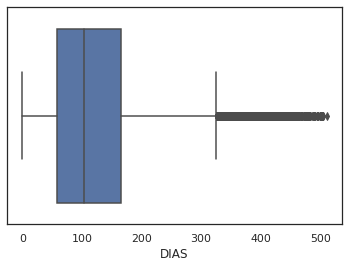

In [ ]:
sns.boxplot(x=df['DIAS']);

> En este boxplot se puede observar que como la variable DIAS al parecer forma dos grupos de valores, en rangos aproximados: 
 - de 60 a 180
 - y en el extremo, de 320 a 500

In [ ]:
#Filtrado por rango intercualtilico
def filtradoIQR(nombre, filtrar0):
  iqr = df[nombre].quantile(0.75) - df[nombre].quantile(0.25)
  filtro_inferior = df[nombre] > df[nombre].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df[nombre] < df[nombre].quantile(0.75) + (iqr * 1.5)
  filtro_0 = df[nombre] > 0
  if filtrar0:
    df_filtrado = df[filtro_inferior & filtro_superior & filtro_0]
  else:
    df_filtrado = df[filtro_inferior & filtro_superior]
  print('                      Sin Filtro   Con Filtro IQR')
  print(f'Media:          {df[nombre].mean():16.2f} {df_filtrado[nombre].mean():16.2f}')
  print(f'Mediana:        {df[nombre].median():16.2f} {df_filtrado[nombre].median():16.2f} ')
  print(f'Media Truncada: {stats.trim_mean(df[nombre], 0.1):16.2f} {stats.trim_mean(df_filtrado[nombre], 0.1):16.2f}')
  print(f'Desviación est: {df[nombre].std():16.2f} {df_filtrado[nombre].std():16.2f}')
  sns.boxplot(x=df_filtrado[nombre]);

                      Sin Filtro   Con Filtro IQR
Media:                    122.35           114.00
Mediana:                  103.00           100.00 
Media Truncada:           111.69           107.13
Desviación est:            84.88            71.81


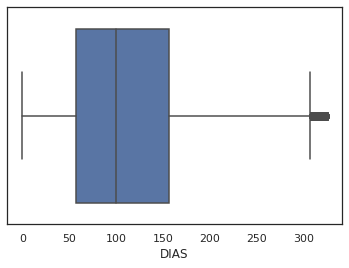

In [ ]:
filtradoIQR('DIAS', filtrar0=False)

 ---
 - Variable COSTO_BIEN
 ---

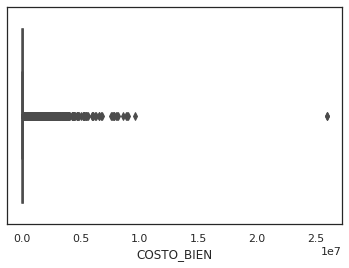

In [ ]:
sns.boxplot(x=df['COSTO_BIEN']);

> En la variable costo la representación de los valores están afectados por valores extremos altos

                      Sin Filtro   Con Filtro IQR
Media:                  70275.95         11089.28
Mediana:                 8192.14          5800.00 
Media Truncada:         17585.91          8264.83
Desviación est:        326497.62         13817.64


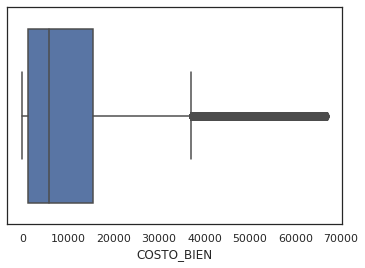

In [ ]:
filtradoIQR('COSTO_BIEN', filtrar0=False)

---
  - Variable monto RECLAMADO
---

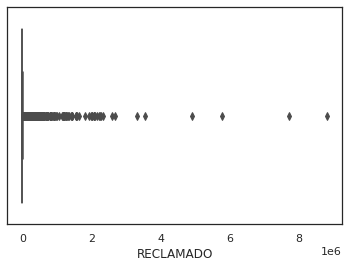

In [ ]:
sns.boxplot(x=df['RECLAMADO']);

                      Sin Filtro   Con Filtro IQR
Media:                   8748.60          1669.83
Mediana:                    0.00          1550.00 
Media Truncada:          1162.79          1631.87
Desviación est:         81162.74          1061.01


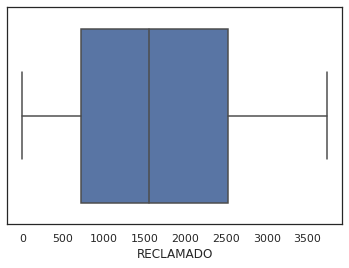

In [ ]:
# Asumiendo omisión en captura de datos en el dataset se analiza con filtrado intercuartil considerando sólo quejas con valor registrado
filtradoIQR('RECLAMADO', filtrar0=True)

---
  - Variable monto RECUPERADO
---

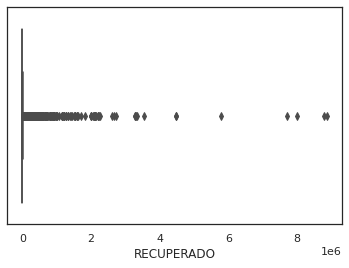

In [ ]:
sns.boxplot(x=df['RECUPERADO']);

                      Sin Filtro   Con Filtro IQR
Media:                   8745.43          1679.59
Mediana:                    0.00          1574.00 
Media Truncada:          1072.84          1639.15
Desviación est:         99635.46          1030.25


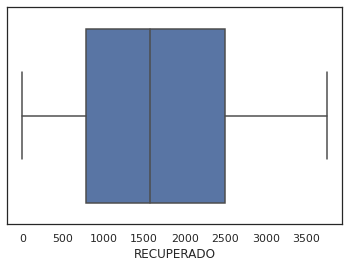

In [ ]:
# Asumiendo omisión en captura de datos en el dataset se analiza con filtrado intercuartil considerando sólo quejas con valor registrado
filtradoIQR('RECUPERADO', filtrar0=True)

---
  - Variable PORCENTAJE_RECUPERADO
---

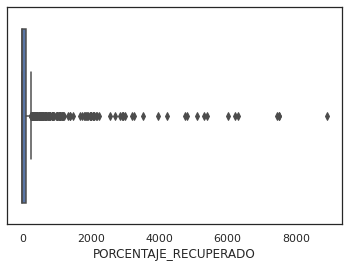

In [ ]:
sns.boxplot(x=df['PORCENTAJE_RECUPERADO']);

                      Sin Filtro   Con Filtro IQR
Media:                     33.33            29.76
Mediana:                    0.00             0.00 
Media Truncada:            24.08            23.84
Desviación est:           118.02            46.63


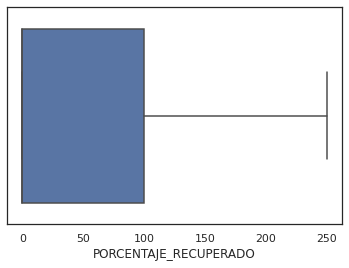

In [ ]:
filtradoIQR('PORCENTAJE_RECUPERADO', filtrar0=False)

### 2. Tablas de frecuencia e histogramas

In [ ]:
# Funciones de apoyo
def tablaFrecuencias(nombre):
  valores = df[nombre]
  segmentos = pd.cut(valores, 20)
  print(df[nombre].groupby(segmentos).count())

def parametrosDistribucion(nombre):
  print(f'Curtosis: {kurtosis(df[nombre])}')
  print(f'Asimetría: {skew(df[nombre])}')
  sns.distplot(df[nombre], kde=True, norm_hist=False, bins=20);

In [ ]:
# Tabla de frecuencias variable DIAS
tablaFrecuencias('DIAS')

DIAS
(-0.511, 25.55]    3747
(25.55, 51.1]      9119
(51.1, 76.65]      9445
(76.65, 102.2]     8691
(102.2, 127.75]    7367
(127.75, 153.3]    6204
(153.3, 178.85]    4474
(178.85, 204.4]    3724
(204.4, 229.95]    2564
(229.95, 255.5]    1955
(255.5, 281.05]    1372
(281.05, 306.6]    1109
(306.6, 332.15]     852
(332.15, 357.7]     481
(357.7, 383.25]     450
(383.25, 408.8]     352
(408.8, 434.35]     258
(434.35, 459.9]     103
(459.9, 485.45]      72
(485.45, 511.0]      35
Name: DIAS, dtype: int64


Curtosis: 1.467129942693152
Asimetría: 1.1995768862053457


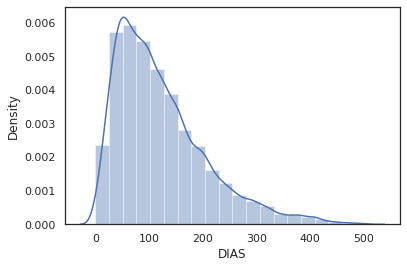

In [ ]:
#sns.distplot(df['DIAS'], kde=True, norm_hist=False, bins=20);
parametrosDistribucion('DIAS')

---
  - La variable DIAS presenta una distribución con cola larga
  - Asimetría positiva, 1.19, con cola más larga hacia la derecha
  - Curtosis positiva, 1.46, implica datos más alejados de la media
---

In [ ]:
def distribucionFiltroIQR(nombre):
  iqr = df[nombre].quantile(0.75) - df[nombre].quantile(0.25)
  filtro_inferior = df[nombre] > df[nombre].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df[nombre] < df[nombre].quantile(0.75) + (iqr * 1.5)
  filtro_0 = df[nombre] > 0
  df_filtrado = df[filtro_inferior & filtro_superior & filtro_0]

  valores = df_filtrado[nombre]
  segmentos = pd.cut(valores, 20)
  print('Tabla de frecuencias con filtro IQR')
  print(df_filtrado[nombre].groupby(segmentos).count())
  print('\n')

  print(f'Curtosis: {kurtosis(df[nombre])}')
  print(f'Asimetría: {skew(df[nombre])}')
  print('\n')
  
  sns.distplot(df_filtrado[nombre], kde=True, norm_hist=False, bins=20);

Tabla de frecuencias con filtro IQR
COSTO_BIEN
(-66.844, 3342.696]       14073
(3342.696, 6685.381]       7527
(6685.381, 10028.067]      5922
(10028.067, 13370.752]     3663
(13370.752, 16713.438]     3019
(16713.438, 20056.123]     2525
(20056.123, 23398.809]     1608
(23398.809, 26741.494]     1362
(26741.494, 30084.18]      1281
(30084.18, 33426.865]       846
(33426.865, 36769.551]      810
(36769.551, 40112.236]      755
(40112.236, 43454.922]      482
(43454.922, 46797.607]      516
(46797.607, 50140.293]      623
(50140.293, 53482.978]      338
(53482.978, 56825.664]      335
(56825.664, 60168.349]      345
(60168.349, 63511.035]      229
(63511.035, 66853.72]       237
Name: COSTO_BIEN, dtype: int64


Curtosis: 1416.8801100426301
Asimetría: 24.980680782967237




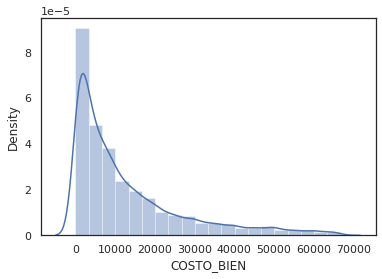

In [ ]:
distribucionFiltroIQR('COSTO_BIEN')

---
  - La variable COSTO_BIEN presenta una distribución con cola larga
  - Asimetría positiva, 24.98, con cola más larga hacia la derecha
  - Curtosis positiva muy alta, 1,416.88, implica datos muy alejados de la media
---

Tabla de frecuencias con filtro IQR
RECLAMADO
(-2.736, 187.8]     335
(187.8, 374.6]      352
(374.6, 561.4]      419
(561.4, 748.2]      395
(748.2, 935.0]      352
(935.0, 1121.8]     384
(1121.8, 1308.6]    287
(1308.6, 1495.4]    243
(1495.4, 1682.2]    334
(1682.2, 1869.0]    287
(1869.0, 2055.8]    351
(2055.8, 2242.6]    216
(2242.6, 2429.4]    247
(2429.4, 2616.2]    303
(2616.2, 2803.0]    194
(2803.0, 2989.8]    185
(2989.8, 3176.6]    337
(3176.6, 3363.4]    197
(3363.4, 3550.2]    268
(3550.2, 3737.0]    172
Name: RECLAMADO, dtype: int64


Curtosis: 4391.231289489629
Asimetría: 53.30540040684912




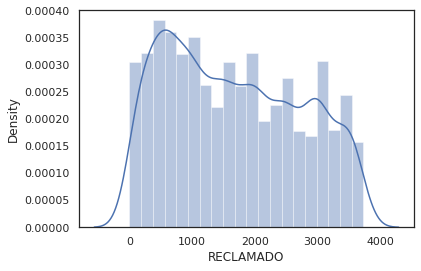

In [ ]:
distribucionFiltroIQR('RECLAMADO')

---
  - La variable RECLAMADO presenta una distribución poco identificable, se están descartando los casos donde no se cuenta con este dato o es 0, en esta imagen podría interpretarse como multimodal, pero no se distinguen claramente los grupos.
  - Asimetría positiva, 53.30, con más datos hacia la derecha
  - Curtosis positiva muy alta, 4,391.23, implica datos muy alejados de la media
---

Tabla de frecuencias con filtro IQR
RECUPERADO
(-3.219, 187.978]       237
(187.978, 375.427]      420
(375.427, 562.876]      523
(562.876, 750.324]      440
(750.324, 937.772]      383
(937.772, 1125.221]     486
(1125.221, 1312.67]     333
(1312.67, 1500.118]     431
(1500.118, 1687.566]    250
(1687.566, 1875.015]    349
(1875.015, 2062.464]    473
(2062.464, 2249.912]    262
(2249.912, 2437.36]     267
(2437.36, 2624.809]     313
(2624.809, 2812.258]    247
(2812.258, 2999.706]    237
(2999.706, 3187.154]    346
(3187.154, 3374.603]    211
(3374.603, 3562.052]    270
(3562.052, 3749.5]      187
Name: RECUPERADO, dtype: int64


Curtosis: 3709.9398291559974
Asimetría: 51.86783968176019




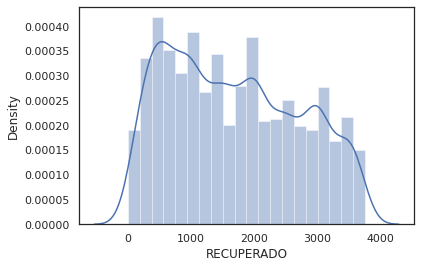

In [ ]:
distribucionFiltroIQR('RECUPERADO')

---
  - La variable RECUPERADO también presenta una distribución poco identificable, se están descartando los casos donde no se cuenta con este dato o es 0, en esta imagen podría interpretarse como multimodal, pero no se distinguen claramente los grupos.
  - Asimetría positiva, 51.86, con más datos hacia la derecha
  - Curtosis positiva muy alta, 3709.9, implica datos muy alejados de la media
---

Tabla de frecuencias con filtro IQR
PORCENTAJE_RECUPERADO
(0.751, 13.441]          75
(13.441, 25.883]         96
(25.883, 38.324]         89
(38.324, 50.765]        271
(50.765, 63.207]        181
(63.207, 75.648]        227
(75.648, 88.089]        296
(88.089, 100.531]     16551
(100.531, 112.972]      182
(112.972, 125.413]      236
(125.413, 137.855]       62
(137.855, 150.296]       40
(150.296, 162.738]       31
(162.738, 175.179]       24
(175.179, 187.62]        28
(187.62, 200.062]       201
(200.062, 212.503]       20
(212.503, 224.944]       13
(224.944, 237.386]       20
(237.386, 249.827]        8
Name: PORCENTAJE_RECUPERADO, dtype: int64


Curtosis: 2034.9442284164525
Asimetría: 37.76159855847715




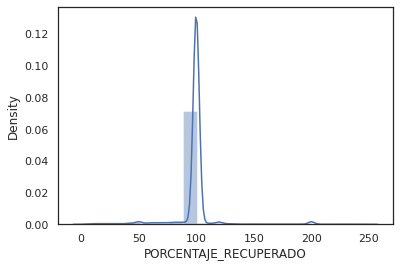

In [ ]:
distribucionFiltroIQR('PORCENTAJE_RECUPERADO')

---
  - La variable PORCENTAJE_RECUPERADO presenta una forma de distribución Cauchy.
  - Asimetría positiva, 37.76, con más datos hacia la derecha
  - Curtosis positiva muy alta, 2034.94, implica datos muy alejados de la media
---

### 3. Gráficas de densidad comparativas

In [ ]:
# Funciones de apoyo
def dfFiltrado(nombre):
  iqr = df[nombre].quantile(0.75) - df[nombre].quantile(0.25)
  filtro_inferior = df[nombre] > df[nombre].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df[nombre] < df[nombre].quantile(0.75) + (iqr * 1.5)
  filtro_0 = df[nombre] > 0
  df_filtrado = df[filtro_inferior & filtro_superior & filtro_0]
  return df_filtrado[nombre]

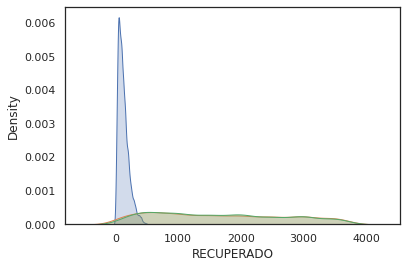

In [ ]:
sns.distplot(df['DIAS'], hist = False, kde_kws = {'shade': True})
sns.distplot(dfFiltrado('RECLAMADO'), hist = False, kde_kws = {'shade': True})
sns.distplot(dfFiltrado('RECUPERADO'), hist = False, kde_kws = {'shade': True});

---
 - En las distribuciones de las variables DIAS presenta un comportamiento muy diferente a las variables RECLAMADO y RECUPERADO, y estas dos variables son muy similares entre si. 
---

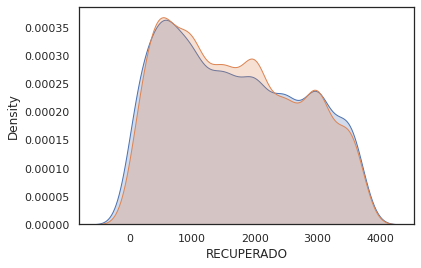

In [ ]:
sns.distplot(dfFiltrado('RECLAMADO'), hist = False, kde_kws = {'shade': True})
sns.distplot(dfFiltrado('RECUPERADO'), hist = False, kde_kws = {'shade': True});

---
 - Las distribuciones de las variables RECLAMADO Y RECUPERADO son muy similares. Podríamos considerar que cuando un consumidor gana un caso es muy probable que recupere todo o más del monto reclamado.
---

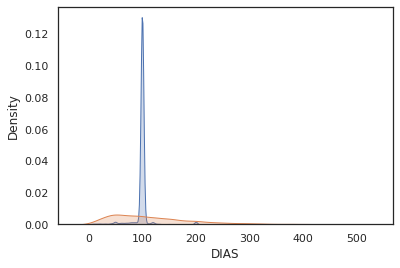

In [ ]:
sns.distplot(dfFiltrado('PORCENTAJE_RECUPERADO'), hist = False, kde_kws = {'shade': True})
sns.distplot(df['DIAS'], hist = False, kde_kws = {'shade': True});

---
 - En las distribuciones de las variables DIAS Y PORCENTAJE_RECUPERADO se observan comportamientos muy diferentes. 
---

RESPONSABLE:
- Ada

# POSTWORK 3
### Requisitos:

- Tener un dataset limpio.
- Tener una serie de preguntas que queremos contestar usando nuestro dataset.
- Haber explorado ya la distribuciones de nuestras variables numéricas.

### Desarrollo:
En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
1. Identifica todas las variables categóricas en tu dataset.
2. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
3. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
4. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
5. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
- De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

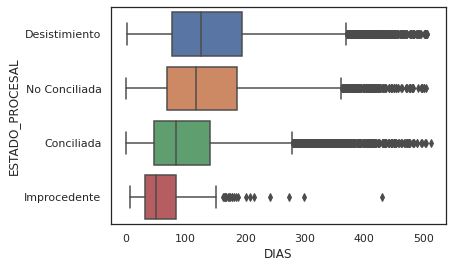

In [ ]:
sns.boxplot(x=df['DIAS'], y=df['ESTADO_PROCESAL']);

RESPONSABLE:
- Hazael

# POSTWORK 4
En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.
Utilizando tu dataset, realiza las siguientes actividades:

- Identifica cuáles son las variables numéricas en tu dataset.
- Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

RESPONSABLE:
- Antonio

# POSTWORK 5
En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

- Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
- Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
- La distribución, su asimetría y curtosis
- El error estándar
- El intervalo de confianza que te parezca más apropiado
- Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.
- Comparte con tus compañeros y la experta tus hallazgos.

RESPONSABLE:
- Antonio

# POSTWORK 6
En esta sesión conocimos muchos nuevos tipos de gráficas que nos ayudan a explorar y entender con más detalle nuestros datos. Ojalá y hayas percibido el poder tan grande que tienen las visualizaciones y la variedad tan enorme que existe. Cada visualización tiene sus ventajas y desventajas, sus características específicas, y es importante conocerlas bien para poder elegir la gráfica adecuada para cada momento. Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy. Aquí hay un pequeño 'cheat sheet' para tomar estas decisiones:

- Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
- Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
- Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
- Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
- Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.
- Si quieres conocer más gráficas para aplicarlas a tu proyecto, puedes visitar el siguiente [Notebook](https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step). Este Notebook contiene alrededor de 80 gráficas distintas elaboradas con matplotlib y otras librerías de visualización de Python. Explora el Notebook y si encuentras alguna gráfica que te pueda ser de utilidad consulta con tu experta para saber cómo aplicarla.

PLURALSIGHT y cuestionarios 

RESPONSABLE:
- Bernardo

# POSTWORK 7
### Requisitos
Tener un dataset limpio que contenga una columna con datos no estructurados.

En caso de que tu dataset no contenga datos no estructurados, date una vuelta por Kaggle y busca algún dataset apropiado. Lo que nos interesa es que practiques estas herramientas durante la clase para que puedas expresar tus dudas a la experta.

### Desarrollo:
En esta sesión aprendimos dos cosas: Pruebas A/B y Procesamiento de Lenguaje Natural. No podemos practicar Pruebas A/B en nuestro proyecto, porque en realidad los proyectos que estamos realizando no se prestan a esto. No pasa nada, ¡ya tendrás oportunidad de practicar eso en tu primer trabajo como científico de datos!

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido. Si tu dataset no contiene datos no estructurados, busca un dataset apropiado y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

- Utiliza patrones Regex para limpiar tus datos estructurados.
- Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. - Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
- Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
- Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
- Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
- Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
- Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

Dataset:
- [Reseñas de productos Flipkart en Kaggle.com](https://www.kaggle.com/datasets/mansithummar67/flipkart-product-review-dataset)
- Este conjunto de datos contiene información sobre el nombre de los productos, el precio, la reseña, la calificación y el resumen o título en la reseña para fines de análisis de opinión. El conjunto de datos se puede utilizar para una variedad de aplicaciones como predicción de precios, análisis de sentimiento, revisiones generadas por Auto Ai e investigaciones de mercado.
- Contiene:
  - 104 tipos de productos diferentes en flipkart.com 
  - 5 columnas y cerca de 190,000 filas.
- La Reseña del cliente o el Resumen, combinados con la calificación del producto y su categorización como positiva, neutra o negativa pueden usarse para fines de análisis de sentimientos.

-

In [ ]:
import pandas as pd

In [ ]:
df_flipkart = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m1/raw/main/dat/flipkart_product_v5.zip', encoding_errors='ignore' ) # ignorar errores de encode facilita la limpieza al poner un ? en el texto en los caracteres que no pudo traducir a diferencia de encoding = 'unicode_escape' o encoding = 'ISO-8859-1'

In [ ]:
df_flipkart.head(3)

,ProductName,Price,Rate,Review,Summary
0,"Candes 12 L Room/Personal Air Cooler??(White, ...","??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,"Candes 12 L Room/Personal Air Cooler??(White, ...","??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,"Candes 12 L Room/Personal Air Cooler??(White, ...","??3,999",3,Fair,The quality is good but the power of air is de...


In [ ]:
df_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


## 1. Limpieza de dataframe

In [ ]:
# Eliminando registros con valores nulos
df_flipkart.dropna(inplace=True)

In [ ]:
# Eliminando caracteres distintos a alfanuméricos
df_flipkart['ProductName'] = df_flipkart['ProductName'].str.replace('[^\w\s]','')
df_flipkart['Price'] = df_flipkart['Price'].str.replace('[^\w\s]','')

<ipython-input-10-d46129591084>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ProductName'] = df['ProductName'].str.replace('[^\w\s]','')
<ipython-input-10-d46129591084>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace('[^\w\s]','')


In [ ]:
df_flipkart.head(3)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,Fair,The quality is good but the power of air is de...


In [ ]:
# Precios con texto
df_flipkart[df_flipkart['Price'].str.contains('[a-z]', case=False)].count()

ProductName    3
Price          3
Rate           3
Review         3
Summary        3
dtype: int64

In [ ]:
# Eliminando registros con texto en campos numéricos
df_flipkart.drop(df_flipkart[df_flipkart['Price'].str.contains('[a-z]', case=False)].index, inplace=True)
df_flipkart.drop(df_flipkart[df_flipkart['Rate'].str.contains('[a-z]', case=False)].index, inplace=True)

In [ ]:
# Conversiones numéricas
df_flipkart['Price']= pd.to_numeric(df_flipkart['Price'])
df_flipkart['Rate']= pd.to_numeric(df_flipkart['Rate'])

In [ ]:
df_flipkart.head(3)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,Fair,The quality is good but the power of air is de...


In [ ]:
# muestra aleatoria de textos para reducir tiempos de ejecución
df_flipkart = df_flipkart.sample(10000, replace=False)

## 2. Análisis de variable no estructurada Summary
### 2.1 Extracción y limpieza de datos 

In [ ]:
df_Summary = df_flipkart['Summary'].copy()                   # Selecciona la variable

In [ ]:
df_Summary.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 167206 to 64385
Series name: Summary
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB


In [ ]:
df_Summary = df_Summary.str.lower()                 # convertir todo a minúsculas
df_Summary = df_Summary.str.strip()                 # elimina espacios iniciales y finales
df_Summary = df_Summary.str.replace('[^\w\s]+', '') # elimina caracteres no alfanuméricos
df_Summary = df_Summary.str.replace('\d', '')       # elimina caracteres numéricos
df_Summary = df_Summary.str.replace('\\n', '')      # elimina saltos de línea

<ipython-input-19-bcb75ee783f7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Summary = df_Summary.str.replace('[^\w\s]+', '') # elimina caracteres no alfanuméricos
<ipython-input-19-bcb75ee783f7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Summary = df_Summary.str.replace('\d', '')       # elimina caracteres numéricos
<ipython-input-19-bcb75ee783f7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Summary = df_Summary.str.replace('\\n', '')      # elimina saltos de línea


In [ ]:
df_Summary.head(3)

167206                                          very useful
157161    fantastic watch awesome designbattery goodover...
81145                    after a day iron light not working
Name: Summary, dtype: object

### 2.2 Objeto Text y exploración de contexto

 Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. - Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Separa el texto de cada renglón en tokens/palabras
tokenized = df_Summary.apply(nltk.word_tokenize)

In [ ]:
tokenized

167206                                       [very, useful]
157161    [fantastic, watch, awesome, designbattery, goo...
81145            [after, a, day, iron, light, not, working]
134720                                            [average]
62693                                       [nice, product]
                                ...                        
37749     [size, is, small, need, more, equipment, to, f...
74699     [amazing, product, special, thanks, to, the, d...
106734                                               [good]
107902    [as, shown, as, i, found, this, best, for, groom]
64385     [thank, you, delivered, at, correct, time, and...
Name: Summary, Length: 10000, dtype: object

In [ ]:
# Suma de todas las listas concatena en una lista todas las palabras del conjunto de datos
all_words = tokenized.sum()
all_words[:20]

['very',
 'useful',
 'fantastic',
 'watch',
 'awesome',
 'designbattery',
 'goodover',
 'all',
 'nice',
 'after',
 'a',
 'day',
 'iron',
 'light',
 'not',
 'working',
 'average',
 'nice',
 'product',
 'image']

In [ ]:
# Eliminación de palabras sin relevancia para el análisis
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
all_words_except_stop_words[:20]

['useful',
 'fantastic',
 'watch',
 'awesome',
 'designbattery',
 'goodover',
 'nice',
 'day',
 'iron',
 'light',
 'working',
 'average',
 'nice',
 'product',
 'image',
 'quality',
 'isnt',
 'great',
 'rendering',
 'grainy']

In [ ]:
print(f'Todas las palabras: {len(all_words)}')
print(f'Sólo palabras relevantes: {len(all_words_except_stop_words)}')

Todas las palabras: 74725
Sólo palabras relevantes: 47139


In [ ]:
# Creación de objeto Text
text = nltk.Text(all_words_except_stop_words)
text

<Text: useful fantastic watch awesome designbattery goodover nice day...>

In [ ]:
# Exploración de contextos de palabras
text.concordance('good', lines=20)

Displaying 20 of 4063 matches:
time taking hour full charged really good stuff price overall things good sold
ally good stuff price overall things good soldering excellent yet got job done
ery penny love productthank filpkart good wore one time poor quality thank fli
ieve flipkartnot items useful device good nice good productbut fit heavy stitc
artnot items useful device good nice good productbut fit heavy stitch excellen
ior evry thing disappointment laptop good nice cycle budget worth money instal
mo given useful us happy use product good quality worst product waste money in
 product packing properly sound bass good sorry old comment color quality good
good sorry old comment color quality good excellent product nice perfect nice 
ect nice big long home prde nice thx good best cycle price range feels like ch
installation guy coming installation good polite totally satisfied product str
alue money xcellent see looks pretty good pretty tough assemble good item goit
ks pretty good pretty

In [ ]:
# palabras similares
text.similar('good')

nice product quality super awesome excellent bad best ok great amazing
superb price happy really one products worst love like


In [ ]:
text.concordance('nice', lines=20)

Displaying 20 of 1942 matches:
watch awesome designbattery goodover nice day iron light working average nice 
 nice day iron light working average nice product image quality isnt great ren
r quality thank flipkart wroth money nice product average better niceexcellent
flipkartnot items useful device good nice good productbut fit heavy stitch exc
vry thing disappointment laptop good nice cycle budget worth money installatio
t weeks time happened multiple times nice nice product worst product awesome p
ks time happened multiple times nice nice product worst product awesome produc
color quality good excellent product nice perfect nice big long home prde nice
 good excellent product nice perfect nice big long home prde nice thx good bes
nice perfect nice big long home prde nice thx good best cycle price range feel
tiching good bad product l purchased nice product product excellent lovedit va
void good product must buy good cost nice gd super super worthable price produ
g room sound best pri

In [ ]:
# palabras similares
text.similar('nice')

good product quality awesome bad excellent super best ok amazing great
price superb happy go like really worst one love


In [ ]:
text.concordance('quality', lines=20)

Displaying 20 of 1184 matches:
 working average nice product image quality isnt great rendering grainy images 
nk filpkart good wore one time poor quality thank flipkart wroth money nice pro
en useful us happy use product good quality worst product waste money installat
d bass good sorry old comment color quality good excellent product nice perfect
d meet safe package low budget good quality tds water filtered tds value money 
using one month running slowly good quality good product nice like cotton mat g
anks flipkart nice product material quality good thin material good product nic
ade purification easy cocoa powders quality best comparison brands cocoa powder
t coverage ghz u get coverage built quality good heating issue found app also c
installation dont worry itregarding quality fully satisfied product kitchen set
t product everyone buy product good quality best quality product xcelent cheap 
ryone buy product good quality best quality product xcelent cheap quality produ
 best qua

In [ ]:
# palabras similares
text.similar('quality')

product good nice awesome super price one excellent ok best bad really
products happy like amazing superb love delivery go


In [ ]:
text.concordance('worst', lines=20)

Displaying 20 of 135 matches:
g plate small rating flipkart laptop worst experience got purchasing laptop del
ul us happy use product good quality worst product waste money installation sud
ned multiple times nice nice product worst product awesome product packing prop
fied clear instructions working fine worst quality locking properly thank insta
ly good super good product good nice worst dont buy anyone nice product good go
d product good quality mattress good worst option select never purchase xiaomi 
ver purchase xiaomi product flipkart worst experience small nice good product n
act good product thick materialsnice worst product stopped working months satis
ity good beautiful good looking good worst product nice think buy supporting fi
excellent product super quality nice worst product sold online sites supersuper
ings great thing nice happy purchase worst product st quality heavy plastic bod
hase nice item wrost quality product worst product ever dont buy camera goodoth
duct soft 

In [ ]:
# palabras similares
text.similar('worst')

good nice best amazing bad product awesome excellent quality great
super superb like poor love happy wonderful price better sound


In [ ]:
# common_contexts regresa los contextos que comparten dos o más palabras
text.common_contexts(['poor', 'bad'])

product_quality good_quality quality_good nice_quality good_product
price_quality flipkart_quality product_working satisfied_product
costly_quality v_good quality_product product_products nice_product
product_good quality_nice v_quality quality_quality


In [ ]:
text.common_contexts(['good', 'product'])

good_product nice_product product_good product_quality good_good
good_quality good_nice quality_product nice_quality quality_good
nice_good money_good quality_nice nice_nice awesome_product
excellent_product flipkart_quality money_nice bad_good good_best


In [ ]:
# Medidas
print(f'Total de palabras {len(text)}')
print(f'Cuantificación de la riqueza léxica {len(set(text)) / len(text)}')

Total de palabras 47139
Cuantificación de la riqueza léxica 0.13373215384289017


### 2.3 Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.

In [ ]:
# Colocaciones o pares de palabras (BIGRAMAS) inusualmente comunes en este conjunto de datos
text.collocations()


value money; nice product; good product; dont buy; thanks flipkart;
waste money; thank flipkart; price range; must buy; little bit; worth
money; product good; battery backup; good quality; light weight; easy
use; dinner set; poor quality; product product; sound quality


In [ ]:
text.concordance('money', lines=20)

Displaying 20 of 442 matches:
me poor quality thank flipkart wroth money nice product average better niceexce
 laptop good nice cycle budget worth money installation demo given useful us ha
uct good quality worst product waste money installation suddenly laptop hangs m
t months ago wrking smooth far value money xcellent see looks pretty good prett
duct product excellent lovedit value money great product super like good like p
uct elastic got loose one wash waste money received meet safe package low budge
quality tds water filtered tds value money dry iron surprisingly super fast del
oldering work home really good value money superfast delivery flipkart big than
tter nice thanks flipcart full value money good awesome pre filter used ro uv p
back pureitduring installation value money router pros wifi coverage good u exp
ality product suitable printer waste money return policy well really good produ
really good product loveit worth gor money st timers best router good packaging
pkart earl

In [ ]:
text.concordance('flipkart', lines=20)

Displaying 20 of 454 matches:
d wore one time poor quality thank flipkart wroth money nice product average b
ake poor qualityi request dont buy flipkart team dont refer thiswe believe fli
uct goodbut big plate small rating flipkart laptop worst experience got purcha
ood value money superfast delivery flipkart big thanks brilliant dishwasher ne
tisfied water hot long hours thank flipkart bajaj installation service liked w
t good nice watch nice good thanks flipkart nice product material quality good
od product nice product good thank flipkart nice product level indication spin
est comparison brands cocoa powder flipkart selling pack cocoa powder together
n nice awesome bat love much thank flipkart good average product cushions rise
packaging range good bhk flatthank flipkart early delivery product awesome mon
ct better nice nice product thanks flipkart moonstruck pure camphor comfortabl
ct good product awesome nice thank flipkart satisfactory great awesome product
 quality good product 

In [ ]:
# Frecuencia de palabras
freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist

FreqDist({'good': 4063, 'product': 3096, 'nice': 1942, 'quality': 1184, 'best': 514, 'flipkart': 454, 'money': 442, 'price': 431, 'super': 409, 'awesome': 395, ...})

In [ ]:
# Porcentaje de aparición de la palabra más frecuente
print(f'{(100 * freq_dist["good"] / len(all_words_except_stop_words)):.3f}%')

8.619%


In [ ]:
# Las 30 palabras más frecuentes
freq_dist.most_common(30)

[('good', 4063),
 ('product', 3096),
 ('nice', 1942),
 ('quality', 1184),
 ('best', 514),
 ('flipkart', 454),
 ('money', 442),
 ('price', 431),
 ('super', 409),
 ('awesome', 395),
 ('bad', 384),
 ('buy', 363),
 ('one', 336),
 ('excellent', 293),
 ('like', 266),
 ('value', 261),
 ('ok', 257),
 ('working', 252),
 ('dont', 252),
 ('also', 251),
 ('delivery', 237),
 ('happy', 234),
 ('go', 226),
 ('use', 219),
 ('time', 206),
 ('great', 201),
 ('really', 196),
 ('thanks', 195),
 ('small', 179),
 ('amazing', 174)]

### 2.4 Visualizaciones

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

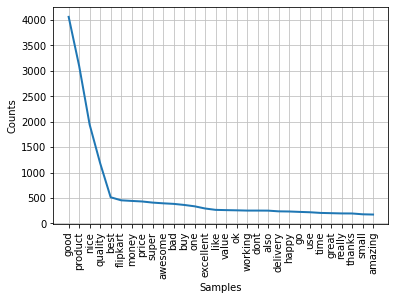

In [ ]:
# Conteos de las 30 palabras más frecuentes
freq_dist.plot(30, cumulative=False);

Se observa que las primeras 10-12 palabras se distinguen del resto por el mayor conteo.

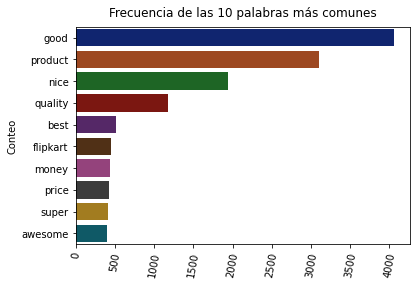

In [ ]:
# Selección de las primeras 10 palabras más comunes
n_most_common = 10
most_common = np.array(list(map(lambda x: list(x), freq_dist.most_common(n_most_common))))
x_1 = pd.to_numeric(most_common[:, 1])
y_1 = list(most_common[:, 0])

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=x_1, y=y_1, ax=ax, palette='dark', orient='h');
ax.set_title(f'Frecuencia de las {n_most_common} palabras más comunes', pad=10)
ax.set_ylabel('Conteo')
ax.tick_params(axis='x', rotation=80)

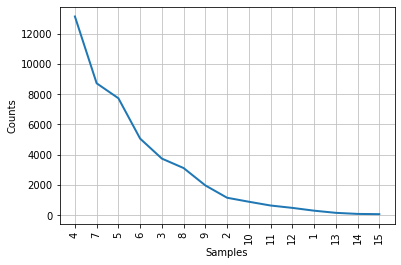

In [ ]:
# Distribución de frecuencias de la longitud de palabras
freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])
freq_dist_lengths.plot(15, cumulative=False);

Se observa que la longitud de palabra más frecuente es de 4, con más de 12,000 conteos.

In [ ]:
# Distribución de frecuencias de los bigramas
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('good', 'product'): 884, ('nice', 'product'): 638, ('product', 'good'): 595, ('good', 'good'): 401, ('good', 'quality'): 319, ('product', 'nice'): 269, ('good', 'nice'): 264, ('nice', 'good'): 233, ('value', 'money'): 216, ('quality', 'good'): 209, ...})

<ipython-input-74-2e2c66eb255b>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(n_most_common))))


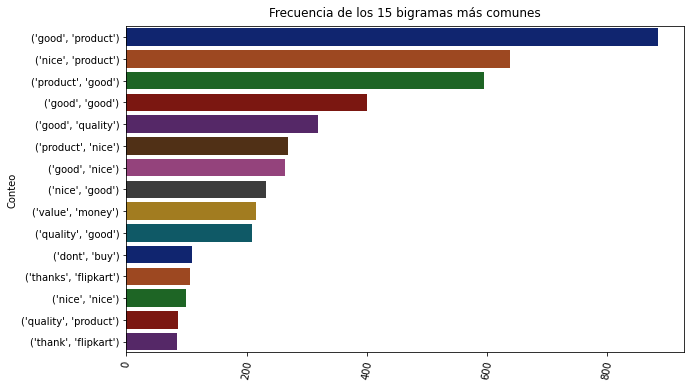

In [ ]:
# Selección de los n bigramas más comunes
n_most_common = 15
most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(n_most_common))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common[:, 1], y=most_common[:, 0], ax=ax, palette='dark', orient='h');
ax.set_title(f'Frecuencia de los {n_most_common} bigramas más comunes', pad=10)
ax.set_ylabel('Conteo')
ax.tick_params(axis='x', rotation=80)

In [ ]:
from wordcloud import WordCloud

In [ ]:
dict_of_counts = {item:all_words_except_stop_words.count(item) for item in all_words_except_stop_words}
print(dict_of_counts)

{'useful': 95, 'fantastic': 36, 'watch': 62, 'awesome': 395, 'designbattery': 1, 'goodover': 1, 'nice': 1942, 'day': 92, 'iron': 11, 'light': 70, 'working': 252, 'average': 57, 'product': 3096, 'image': 14, 'quality': 1184, 'isnt': 5, 'great': 201, 'rendering': 1, 'grainy': 1, 'images': 6, 'even': 74, 'low': 103, 'iso': 1, 'slow': 31, 'auto': 4, 'focus': 2, 'battery': 91, 'stand': 12, 'time': 206, 'taking': 9, 'hour': 8, 'full': 41, 'charged': 4, 'really': 196, 'good': 4063, 'stuff': 4, 'price': 431, 'overall': 86, 'things': 30, 'soldering': 11, 'excellent': 293, 'yet': 11, 'got': 117, 'job': 23, 'done': 52, 'itquality': 1, 'hillgrove': 1, 'worth': 166, 'every': 59, 'penny': 15, 'love': 116, 'productthank': 4, 'filpkart': 12, 'wore': 1, 'one': 336, 'poor': 127, 'thank': 172, 'flipkart': 454, 'wroth': 2, 'money': 442, 'better': 131, 'niceexcellent': 1, 'delivery': 237, 'service': 129, 'bad': 384, 'days': 105, 'use': 219, 'proformance': 1, 'issues': 29, 'take': 30, 'qualityi': 4, 'reques

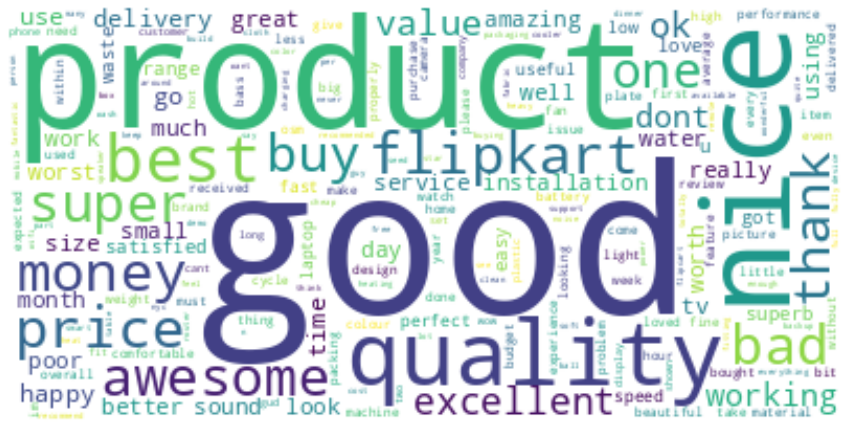

In [ ]:
# Generación de nube de palabras
wordcloud = WordCloud(max_font_size=100, background_color="white", collocations = False).generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Análisis de sentimientos
- Uso de la variable categórica Rate para segmentar los datos y poder comparar las distribuciones de polaridades entre cada segmento.

In [ ]:
from textblob import TextBlob

In [ ]:
# Función que determina, en base a la variable categórica Rate como sentimiento positivo, negativo o neutral 
def analisis(rating):
    if rating<3:
        return 'Negativo'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positivo'
    
df_flipkart['Analisis'] = df_flipkart['Rate'].apply(analisis)

In [ ]:
# Detección de subjetividad y polaridad de las reseñas

# Valor entre 0 y 1, donde 0 es muy objetivo y 1 muy subjetivo
def detectaSubjetividad(text):
    return TextBlob(text).sentiment.subjectivity

# Valor entre -1 y 1, donde -1 se refiere a sentimiento negativo y 1 a sentimiento positivo
def detectaPolaridad(text):
    return TextBlob(text).sentiment.polarity

df_flipkart['Subjetividad'] = df_flipkart['Review'].apply(detectaSubjetividad)
df_flipkart['Polaridad'] = df_flipkart['Review'].apply(detectaPolaridad)


In [ ]:
df_flipkart.head(5)


,ProductName,Price,Rate,Review,Summary,Analisis,Subjetividad,Polaridad
167206,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,Awesome,Very useful,Positivo,1.0,1.00
157161,boAt Wave Neo with 169 inch 25D Curved Displa...,1699,4,Really Nice,Fantastic watch ⌚...Awesome design....Battery ...,Positivo,1.0,0.60
81145,Bajaj DX 2 LW Dry Iron,529,1,Worthless,After a day iron light not working..,Negativo,0.9,-0.80
134720,BROWNIE Engineered Wood Computer Desk Straigh...,1299,2,Not good,Average,Negativo,0.6,-0.35
62693,HAIR CARE Triple Blend Damage Repair NonStick...,113,5,Excellent,nice product,Positivo,1.0,1.00


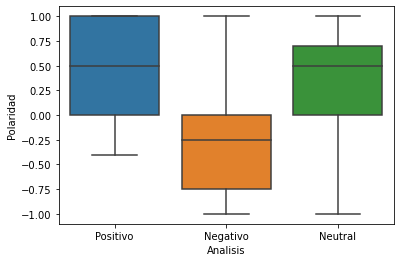

In [ ]:
sns.boxplot(data=df_flipkart, x='Analisis', y='Polaridad');

Se observa que la polaridad (sentimiento positivo o negativo) en general corresponde con la calificación que el cliente otorga al producto y que cuando otorga una calificación neutral el sentimiento tiende a ser más positivo. También se observa que en las calificaciones negativas o neutrales ocurren algunos valores de polaridad extremos: muy positivos y muy negativos.

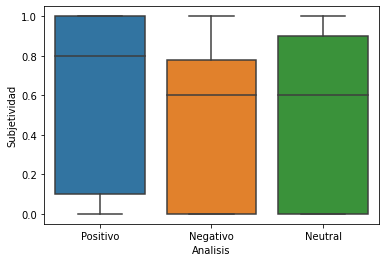

In [ ]:
sns.boxplot(data=df_flipkart, x='Analisis', y='Subjetividad');

Se observa que una elevada subjetividad (> 0.6) predomina en todas las calificaciones, esto es que en más de la mitad de las reseñas el contenido es más opinión que hechos objetivos. Las calificaciones positivas presentan niveles más altos de subjetividad que las negativas y neutrales, cuyos niveles de subjetividad son más bajos.

RESPONSABLE
- Ada

# POSTWORK 8
### Requsitos
Tener un dataset limpio que contenga una variable dependiente binaria.

En caso de que tu dataset no contenga una variable dependiente binaria, date una vuelta por Kaggle y busca algún dataset apropiado. Lo que nos interesa es que practiques estas herramientas durante la clase para que puedas expresar tus dudas a la experta.

### Desarrollo
¡Bienvenid@ a tu último Postwork! En este Postwork haremos dos cosas: practicar la aplicación del algoritmo de Regresión Logística y resolver dudas generales sobre tu proyecto. Realiza los siguientes pasos:

Si hay un problema de clasificación binaria en tu proyecto, ¡genial! Aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.

Si no hay un problema de clasificación binaria en tu proyecto, pídele ayuda a la experta para conseguir un dataset con el que puedas practicar.

Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.
Ojo: si tu proyecto tiene un problema de clasificación multiclase (es decir, la variable dependiente no es binaria sino que contiene más de 2 categorías posibles), pídele ayuda a la experta para aplicar el algoritmo de Regresión Logística Multiclase.

Después de haber realizado esta práctica, aprovecha que es el último Postwork para plantear dudas generales acerca de tu proyecto. Recuerda que tu proyecto será presentado en público ante líderes de la industria y expert@s, así que es una buena idea que te sientas muy cómodo con lo que estás presentando.

Recuerda también que presentar un trabajo de ciencia de datos no trata solamente sobre lo técnico y las evaluaciones estadísticas que realicemos, sino que también requiere de mucho cuidado en la presentación. Aprovecha el tiempo restante para trabajar sobre la presentación de tu proyecto, de manera que se vea atractivo y que presente tus hallazgos con la mayor claridad posible.

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import random
random.seed(2023)

In [155]:
# Filtrado del dataset por rango intercualtilico con la variable RECLAMADO para considerar los casos más representativos de monto reclamado
nombre = 'RECLAMADO'
iqr = df[nombre].quantile(0.75) - df[nombre].quantile(0.25)
filtro_inferior = df[nombre] > df[nombre].quantile(0.25) - (iqr * 1.5)
filtro_superior = df[nombre] < df[nombre].quantile(0.75) + (iqr * 1.5)
filtro_0 = df[nombre] > 0
df = df[filtro_inferior & filtro_superior & filtro_0]

In [156]:
# Cálculo de variable binaria RECUPERACION que indica 1 en caso de que el consumidor logró recuperar un monto y 0 en caso de tener cero recuperación de monto
df['RECUPERACION'] = df['RECUPERADO'].apply(lambda x: 1 if x>0 else 0)
df.head(3)

,FECHA_INGRESO,FECHA_FIN,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,UA,ESTADO_UA,...,PROCEDIMIENTO,BIEN_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL,DIAS,PORCENTAJE_RECUPERADO,RECUPERACION
ID_EXP,,,,,,,,,,,,,,,,,,,,,
2021_3676,2021-01-04 10:50:00,2021-03-29,Turnada a Concil Person p/seg,No Conciliada,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,ZONA GOLFO-SUR (TABASCO),TABASCO,...,Conciliación personal,Servicio,Escrito,Servicio normal,Por internet,Contado,No problema especial,83,0.00,0
2021_3677,2021-01-04 11:03:00,2021-03-29,Turnada a Concil Person p/seg,No Conciliada,"ABC AEROLINEAS, SA DE CV",INTERJET,AEROLÍNEA COMERCIAL,TURÍSTICO,ZONA GOLFO-SUR (TABASCO),TABASCO,...,Conciliación personal,Servicio,Escrito,Servicio normal,Por internet,Contado,No problema especial,83,0.00,0
2021_3455,2021-01-04 12:05:00,2021-06-09,Turnada a Concil Person p/seg,Conciliada,"AEROENLACES NACIONALES, SA DE CV",VIVA AEROBUS,AEROLÍNEA COMERCIAL,TURÍSTICO,ZONA ALTIPLANO (SAN LUIS POTOSÍ),SAN LUIS POTOSÍ,...,Conciliación personal,Servicio,Escrito,Servicio normal,En establecimiento físico,Contado,No problema especial,155,20.00,1


In [157]:
# Codificación de variables categóricas para saber si alguna de ellas pudiera influir en el resultado de recuparación de un monto
dfc = df.drop(columns=[ 'FECHA_INGRESO', 'FECHA_FIN', 'PROVEEDOR', 'PROBLEMA_ESPECIAL'])
def codificacion_categoria(nombre):
  dfc[nombre] = dfc[nombre].astype('category').cat.codes
codificacion_categoria('TIPO_CONCILIACION')
codificacion_categoria('ESTADO_PROCESAL')
codificacion_categoria('NOMBRE_COMERCIAL')
codificacion_categoria('GIRO')
codificacion_categoria('SECTOR')
codificacion_categoria('UA')
codificacion_categoria('ESTADO_UA')
codificacion_categoria('TIPO_RECLAMACION')
codificacion_categoria('MOTIVO_RECLAMACION')
codificacion_categoria('PROCEDIMIENTO')
codificacion_categoria('BIEN_SERVICIO')
codificacion_categoria('MEDIO_INGRESO')
codificacion_categoria('TIPO_PRODUCTO')
codificacion_categoria('MODALIDAD_COMPRA')
codificacion_categoria('MODALIDAD_PAGO')

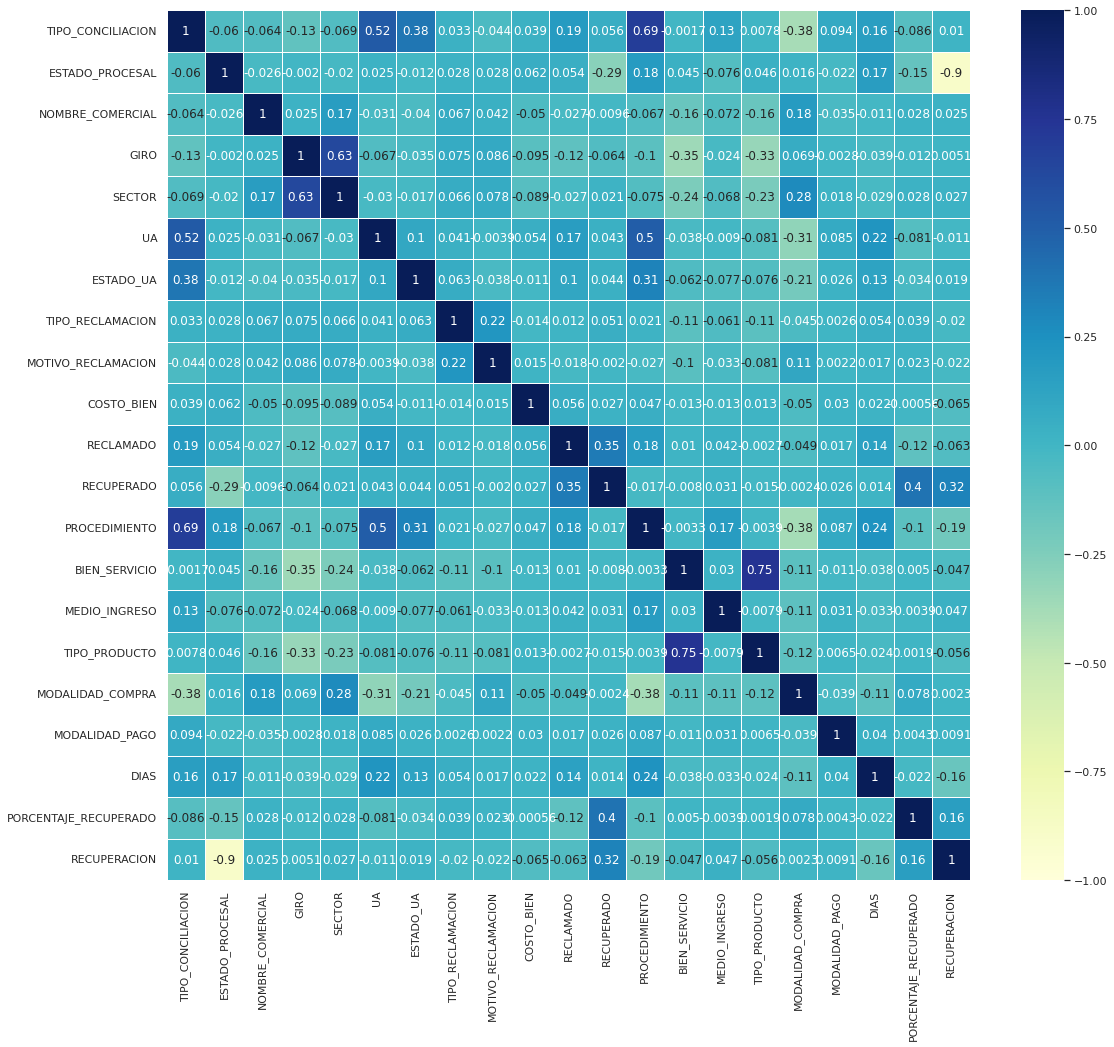

In [158]:
# Revisión de correlaciones para saber cuáles variables probablemente influyen más 
# en la variable RECUPERACION de un monto
plt.figure(figsize=(18,16))
ax = sns.heatmap(dfc.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=1)

- Como es de esperarse, ya que las variables RECUPERADO, PORCENTAJE_RECUPERADO y ESTADO_PROCESAL están relacionadas con el resultado obtenido en RECUPERACION presentan valores de correlación con más importancia. 

- Descartando lo anterior, la variable RECUPERACION presenta muy baja correlación con las variables con las que no está relacionada, las 3 variables que presentan un poco más de correlación con RECUPERACION son: COSTO_BIEN, RECLAMADO Y DIAS.


## Se experimentó primero con un modelo incluyendo todas las variables

In [159]:
# Se seleccionan las variables independientes del dataset eliminando la variable dependiente y las que no son de utilidad en el modelo
X = df.drop(columns=['RECUPERACION', 'FECHA_INGRESO', 'FECHA_FIN', 'PROVEEDOR', 'PROBLEMA_ESPECIAL'])

In [160]:
# Conversión de variables categóricas a numéricas
X['TIPO_CONCILIACION'] = X['TIPO_CONCILIACION'].astype('category').cat.codes
X['ESTADO_PROCESAL'] = X['ESTADO_PROCESAL'].astype('category').cat.codes
X['NOMBRE_COMERCIAL'] = X['NOMBRE_COMERCIAL'].astype('category').cat.codes
X['GIRO'] = X['GIRO'].astype('category').cat.codes
X['SECTOR'] = X['SECTOR'].astype('category').cat.codes
X['UA'] = X['UA'].astype('category').cat.codes
X['ESTADO_UA'] = X['ESTADO_UA'].astype('category').cat.codes
X['TIPO_RECLAMACION'] = X['TIPO_RECLAMACION'].astype('category').cat.codes
X['MOTIVO_RECLAMACION'] = X['MOTIVO_RECLAMACION'].astype('category').cat.codes
X['PROCEDIMIENTO'] = X['PROCEDIMIENTO'].astype('category').cat.codes
X['BIEN_SERVICIO'] = X['BIEN_SERVICIO'].astype('category').cat.codes
X['MEDIO_INGRESO'] = X['MEDIO_INGRESO'].astype('category').cat.codes
X['TIPO_PRODUCTO'] = X['TIPO_PRODUCTO'].astype('category').cat.codes
X['MODALIDAD_COMPRA'] = X['MODALIDAD_COMPRA'].astype('category').cat.codes
X['MODALIDAD_PAGO'] = X['MODALIDAD_PAGO'].astype('category').cat.codes
X.head(3)

,TIPO_CONCILIACION,ESTADO_PROCESAL,NOMBRE_COMERCIAL,GIRO,SECTOR,UA,ESTADO_UA,TIPO_RECLAMACION,MOTIVO_RECLAMACION,COSTO_BIEN,RECLAMADO,RECUPERADO,PROCEDIMIENTO,BIEN_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,DIAS,PORCENTAJE_RECUPERADO
ID_EXP,,,,,,,,,,,,,,,,,,,,
2021_3676,3,2,1088,2,174,16,26,1,49,3425.03,3425.03,0.00,4,2,1,4,4,3,83,0.00
2021_3677,3,2,1088,2,174,16,26,1,49,3556.20,3556.20,0.00,4,2,1,4,4,3,83,0.00
2021_3455,3,0,2337,2,174,9,23,4,52,1541.53,1541.53,308.30,4,2,1,4,1,3,155,20.00


In [161]:
# Se separa la variable independiente
y = df['RECUPERACION']

In [162]:
# Se separa el dataset para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [163]:
# Se crea y entrena un modelo de regresión logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [164]:
# Predicciones
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [165]:
# Desempeño del modelo
logreg.score(X_test, y_test)

0.9977246871444824

In [166]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 351,    0],
       [   4, 1403]])

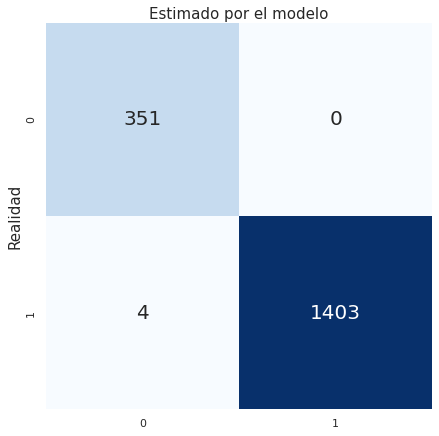

In [167]:
# nombres de clases para heatmap
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# crea heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [168]:
# Indicadores del modelo
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 1.0
Exactitud: 0.9977246871444824
Sensibilidad: 0.9971570717839374
Especificidad: 1.0


In [169]:
# Cálculos de probabilidades para curva ROC / AUC
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:10,:]

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.81584773e-32]])

In [170]:
# Cálculos de curva ROC / AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

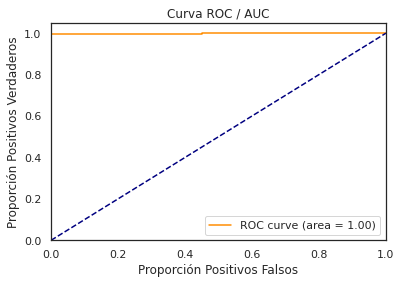

In [171]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos Falsos')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

El valor AUC es muy cercano al 1 (0.99). El modelo puede diferenciar muy bien entre negativos y positivos, es muy probable que elija la clasificación correcta.

## Ya que el modelo anterior utiliza prácticamente toda la información del dataset, se decidió experimentar con un modelo con el mínimo de datos que un consumidor conocería de antemano: el monto que reclama.

In [172]:
X = df.drop(columns=['RECUPERACION', 'PORCENTAJE_RECUPERADO','MODALIDAD_PAGO','MODALIDAD_COMPRA','ESTADO_UA', 'RECUPERADO', 'COSTO_BIEN','FECHA_INGRESO', 'FECHA_FIN', 'NOMBRE_COMERCIAL','TIPO_CONCILIACION','BIEN_SERVICIO', 'MEDIO_INGRESO','ESTADO_PROCESAL','MOTIVO_RECLAMACION', 'PROVEEDOR', 'GIRO','SECTOR','UA', 'TIPO_RECLAMACION', 'PROCEDIMIENTO', 'TIPO_PRODUCTO', 'PROBLEMA_ESPECIAL','DIAS'])
X = X.copy()
X.reset_index(drop=True, inplace=True)
X.sort_values('RECLAMADO', ascending=False).head(3)

,RECLAMADO
474,3737.00
5019,3735.20
5155,3730.80


In [173]:
# Se separa la variable independiente
y = df['RECUPERACION']

In [174]:
# Se separa el dataset para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [175]:
# Se crea y entrena un modelo de regresión logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [176]:
# Predicciones
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [177]:
# Desempeño del modelo
logreg.score(X_test, y_test)

0.8196814562002275

In [178]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,  317],
       [   0, 1441]])

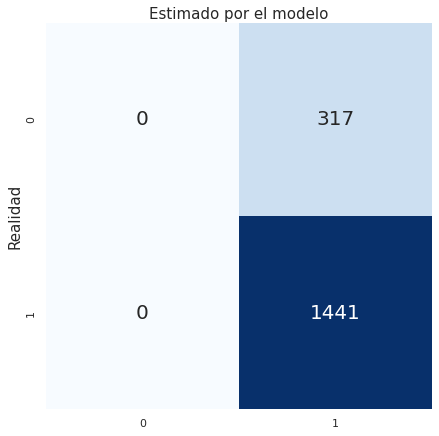

In [179]:
# nombres de clases para heatmap
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# crea heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Aquí se observa que el modelo ya no es capaz de detectar cuándo un consumidor en la realidad no recupera un monto. Esto es, siempre predice que el consumidor recuperará algo del monto reclamado.

## Se decidió realizar un tercer experimento agregando al anterior la variable PORCENTAJE_RECUPERADO, ya que un consumidor puede indicar un porcentaje esperado de recuperación.

In [180]:
X = df.drop(columns=['RECUPERACION', 'MODALIDAD_PAGO','MODALIDAD_COMPRA','ESTADO_UA', 'RECUPERADO', 'COSTO_BIEN','FECHA_INGRESO', 'FECHA_FIN', 'NOMBRE_COMERCIAL','TIPO_CONCILIACION','BIEN_SERVICIO', 'MEDIO_INGRESO','ESTADO_PROCESAL','MOTIVO_RECLAMACION', 'PROVEEDOR', 'GIRO','SECTOR','UA', 'TIPO_RECLAMACION', 'PROCEDIMIENTO', 'TIPO_PRODUCTO', 'PROBLEMA_ESPECIAL','DIAS'])
X = X.copy()
X.reset_index(drop=True, inplace=True)
X.sort_values('RECLAMADO', ascending=False).head(3)

,RECLAMADO,PORCENTAJE_RECUPERADO
474,3737.00,100.00
5019,3735.20,100.00
5155,3730.80,0.00


In [181]:
# Se separa la variable independiente
y = df['RECUPERACION']

In [182]:
# Se separa el dataset para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [183]:
# Se crea y entrena un modelo de regresión logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [184]:
# Predicciones
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [185]:
# Desempeño del modelo
logreg.score(X_test, y_test)

1.0

In [186]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 352,    0],
       [   0, 1406]])

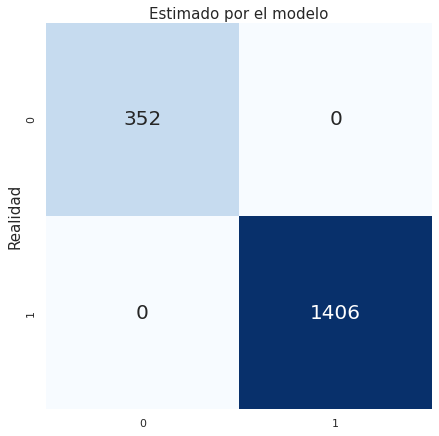

In [187]:
# nombres de clases para heatmap
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# crea heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Al usar la variable RECLAMADO Y PORCENTAJE_RECUPERADO el modelo ya puede predecir la recuperación de monto con exactitud, usando un mínimo de datos

RESPONSABLE:
- Ada